In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data=pd.read_csv('titanic.csv', sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [5]:
data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [6]:
data['Cabin'].fillna('G6',inplace=True)

In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [8]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
data['Embarked'].fillna('S',inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:title={'center':'Distribution of Survivor'}, xlabel='Survived', ylabel='distribution'>

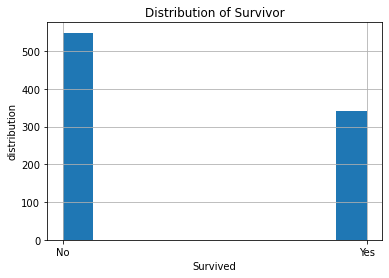

In [11]:
plt.xlabel('Survived')
plt.ylabel('distribution')
plt.title('Distribution of Survivor')
data['Survived'].hist()

<AxesSubplot:title={'center':'Destribution of sex passengers'}, xlabel='Sex', ylabel='Destribution'>

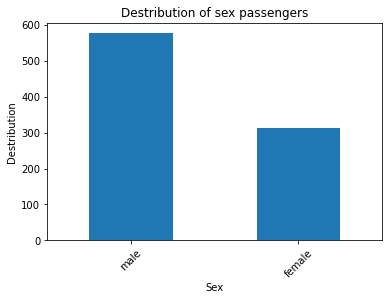

In [15]:
plt.xlabel('Sex')
plt.ylabel('Destribution')
plt.title('Destribution of sex passengers')
data['Sex'].value_counts().plot.bar(rot=45)

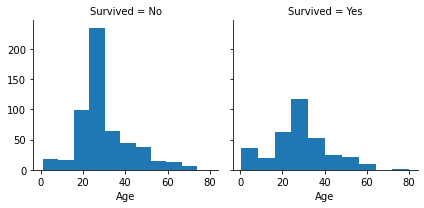

In [21]:
s=sns.FacetGrid(data,col='Survived')
s.map(plt.hist,'Age')

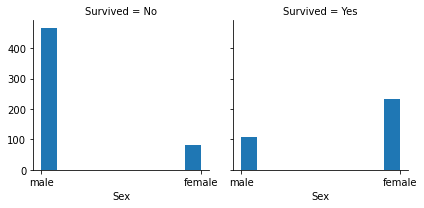

In [19]:
s=sns.FacetGrid(data,col='Survived')
s.map(plt.hist,'Sex')

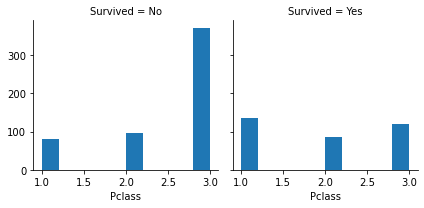

In [24]:
s=sns.FacetGrid(data,col='Survived')
s.map(plt.hist,'Pclass')

In [27]:
data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

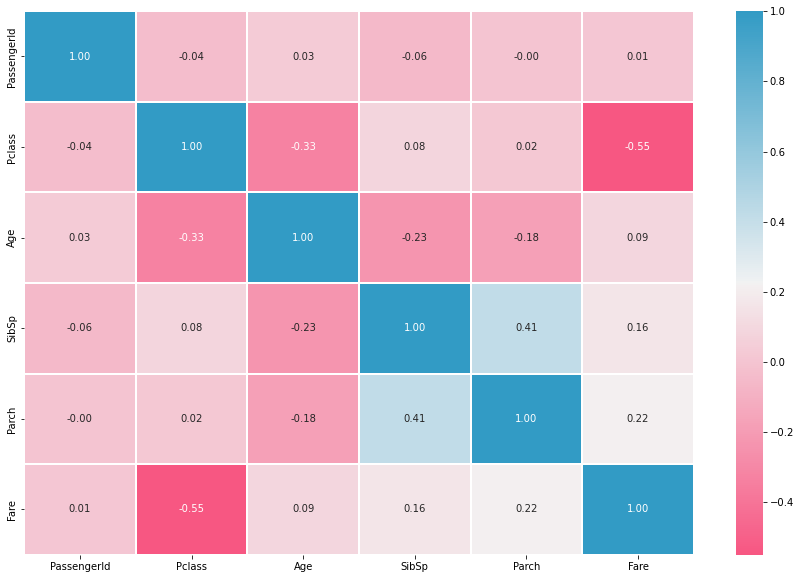

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap=sns.diverging_palette(0, 230, 90, 60, as_cmap=True),linewidth=0.3, annot=True, fmt='.2f', )

In [34]:
new_data={'Survived':{'Yes':1,'No':0}}
data.replace(new_data,inplace=True)
new_data={'Sex':{'male':1,'female':0}}
data.replace(new_data,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


<AxesSubplot:>

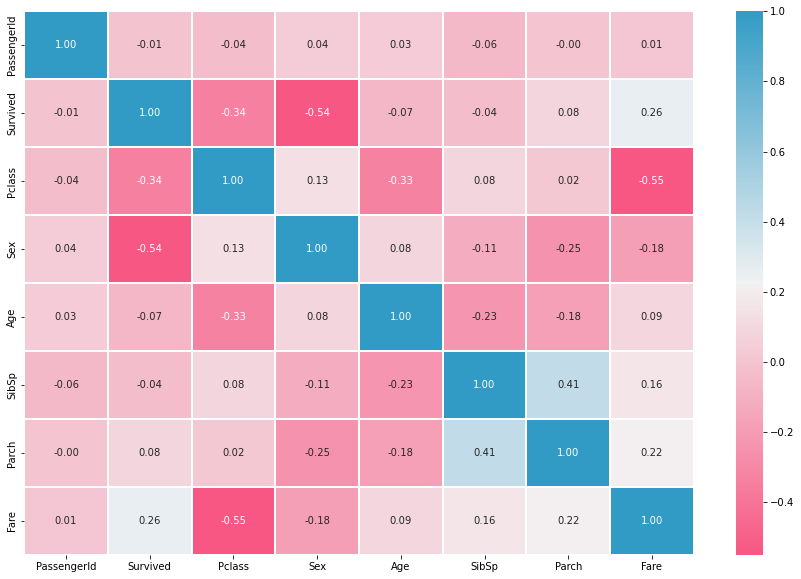

In [38]:
data.info()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap=sns.diverging_palette(0, 230, 90, 60, as_cmap=True),linewidth=0.3, annot=True, fmt='.2f', )

<AxesSubplot:xlabel='Sex'>

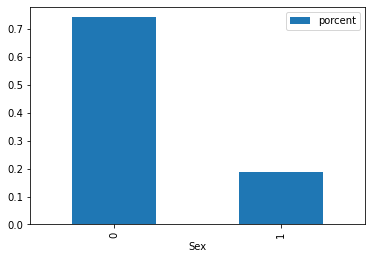

In [42]:
data.groupby('Sex').agg(porcent=('Survived','mean')).plot(kind='bar')

Accuracy=0.81


<AxesSubplot:xlabel='Predicted', ylabel='Real'>

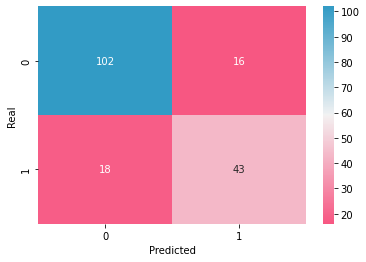

In [50]:
x = data[['Pclass','Age','Sex','Fare']]
y = data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test))) 
conf= pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'])
sns.heatmap(conf, cmap=sns.diverging_palette(0, 230, 90, 60, as_cmap=True),annot=True,fmt='.0f',)